In [2]:
#pnad2014= pd.read_fwf("PES2014.zip", widths=estrutura.Tamanho, header=None, compression="zip")

%matplotlib inline
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
dados_2014 = pd.read_csv("PES2014.csv", sep= ",")
print (os.getcwd())

C:\Users\dell\Documents\GitHub\CD\Projeto 1


In [256]:
dados_2014.V0302 = dados_2014.V0302.astype('category')
dados_2014.V0302.cat.categories = ('Masculino', 'Feminino')

dados_2014.V0404 = dados_2014.V0404.astype('category') #Cor
dados_2014.V0404.cat.categories = ('Indígena', 'Branco', 'Negro', 'Amarelo', 'Pardo', 'Sem declaração')

dados_2014.V6007 = dados_2014.V6007.astype('category')
dados_2014.V6007.cat.categories = ('Primário - Antigo Fundamental', 'Ginásio - Antigo Ensino Medio', 'Científico', 'Ensino Fundamental', 'Ensino Médio',
                                   'EJA - 1Grau', 'EJA - 2Grau', 'Superior', 'Pós Graduação', 'Alfabetização de jovens e adultos',
                                  'Creche', 'Alfabetização para adultos', 'Maternal') 


In [248]:
#Partindo do pressuposto que aposentados são todos aqueles que recebem algum aposentadoria de previdencia ou do Governo Federal
ap_geral_2014 = dados_2014[(dados_2014.V9122 == 2 )]
ap_geral_2014 = ap_geral_2014[(ap_geral_2014.V1252 < 999999999999)]

#Divisão Entre Homens e Mulheres
ap_homens_2014 = ap_geral_2014[(ap_geral_2014.V0302 == 'Masculino')]
ap_mulheres_2014 = ap_geral_2014[(ap_geral_2014.V0302 == 'Feminino')]

ap_homens_univ_2014 = ap_homens_2014[(ap_homens_2014.V6007 == 'Superior')]
ap_homens_univ_2014 = ap_homens_2014[(ap_homens_2014.V6007 == 'Pós Graduação')]

ap_mulheres_univ_2014 = ap_mulheres_2014[(ap_mulheres_2014.V6007 == 'Superior')]
ap_mulheres_univ_2014 = ap_mulheres_2014[(ap_mulheres_2014.V6007 == 'Pós Graduação')]

#Etnias Geral
ap_geral_brancos_2014 = ap_geral_2014[(ap_geral_2014.V0404 == 'Branco')]
ap_geral_negros_2014 = ap_geral_2014[(ap_geral_2014.V0404 == 'Negro')]
ap_geral_pardos_2014 = ap_geral_2014[(ap_geral_2014.V0404 == 'Pardo')]
ap_geral_amarelos_2014 = ap_geral_2014[(ap_geral_2014.V0404 == 'Amarelo')]
ap_geral_indios_2014 = ap_geral_2014[(ap_geral_2014.V0404 == 'Indigena')]

## Comparando a Educação de Homens e Mulheres

In [259]:
cross1 = pd.crosstab(ap_geral_2014.V6007,ap_geral_2014.V0302)
cross1

V0302,Masculino,Feminino
V6007,,
Primário - Antigo Fundamental,7455,7238
Ginásio - Antigo Ensino Medio,1440,1232
Científico,996,1139
Ensino Fundamental,1573,1276
Ensino Médio,1461,1425
EJA - 1Grau,193,274
EJA - 2Grau,196,211
Superior,1761,2452
Pós Graduação,115,124


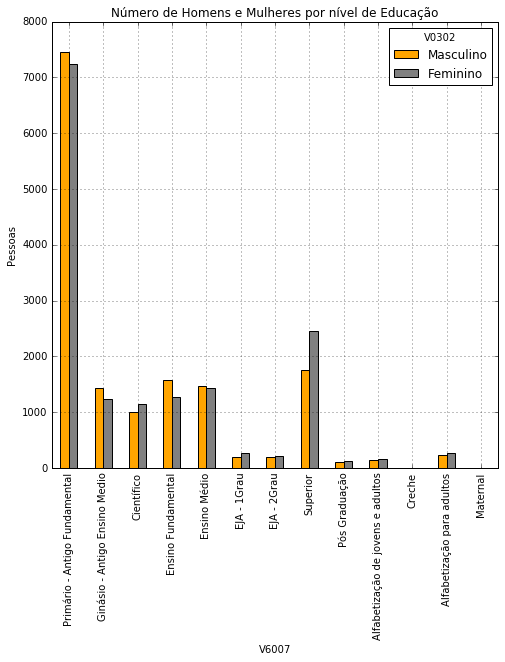

In [260]:
cross1.plot(kind='bar', figsize = (8,8), color = ('orange', 'gray'), grid= True, title='Número de Homens e Mulheres por nível de Educação')
plt.ylabel('Pessoas')

######  Gráfico 1

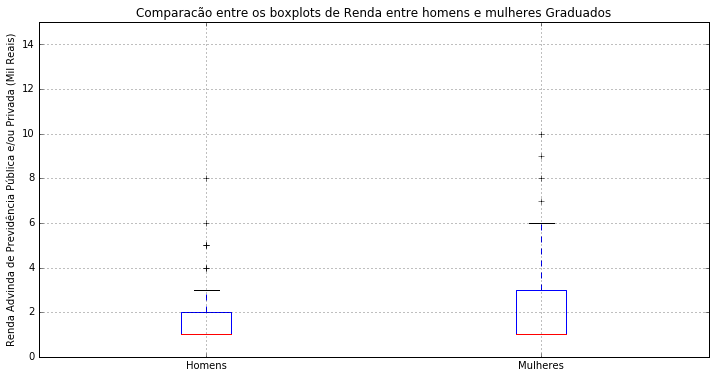

In [174]:
dici_renda_geral = {'Homens':ap_homens_univ_2014.V1252.value_counts(), 'Mulheres': ap_mulheres_univ_2014.V1252.value_counts()}
para_rendas =  pd.DataFrame.from_dict(data=dici_renda_geral)
para_rendas.plot.box(figsize=(12,6), legend= True, grid = True, title= 'Comparacão entre os boxplots de Renda entre homens e mulheres Graduados' )
axes = plt.gca()
axes.set_ylim([0,15])
plt.ylabel('Renda Advinda de Previdência Pública e/ou Privada (Mil Reais)')
plt.show()

###### Gráfico 2

### Entre homens e mulheres aposentados pode-se concluir que:

#### O Gráfico 1 nos permite observar que o número de mulheres aposentadas que frequentaram a faculdade ou Pós Graduação é maior que o número de homens. Sabendo disso, é possível inferir que o grupo das mulheres aposentadas está melhor que o grupo dos homens aposentados visto que o acesso à educação, cultura e conhecimento é maior entre as mulheres.  

#### O Gráfico 2 confirma a tese de que as mulheres aposentadas estão melhores do que os homens aposentados. Há uma relação entre os gráficos que nos permite inferir que as mulheres, por terem estudado mais e, talvez, terem tido melhores empregos, possuem salários maiores que os dos homens.

#### As mulheres aposentadas são melhores que os homens aposentados nos quesitos "Educação" e "Renda de Aposentadoria".

## Comparando Etnias

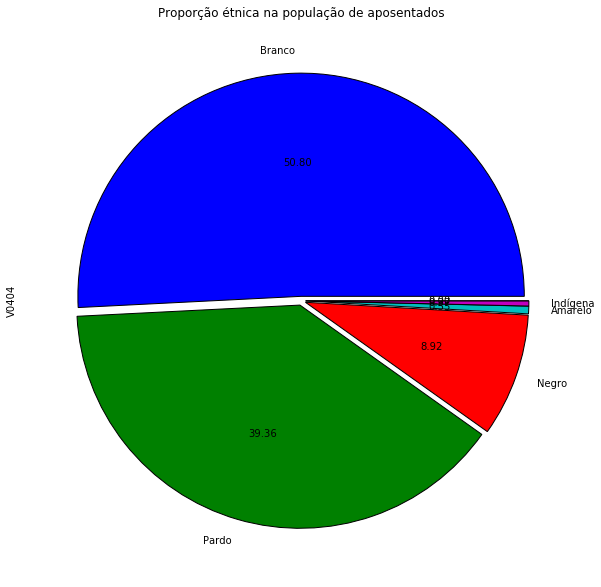

In [257]:
ap_geral_2014.V0404.value_counts().plot(kind='pie', figsize = (10,10), autopct='%0.2f', explode = [0.02,0.02,0.02,0.02,0.02,0.02], title='Proporção étnica na população de aposentados')

###### Gráfico 1

In [252]:
dici2 = {'Brancos': ap_geral_brancos_2014.V1252.value_counts(), 'Negros':ap_geral_negros_2014.V1252.value_counts(),
        'Pardos':ap_geral_pardos_2014.V1252.value_counts(), 'Amarelos': ap_geral_amarelos_2014.V1252.value_counts()}

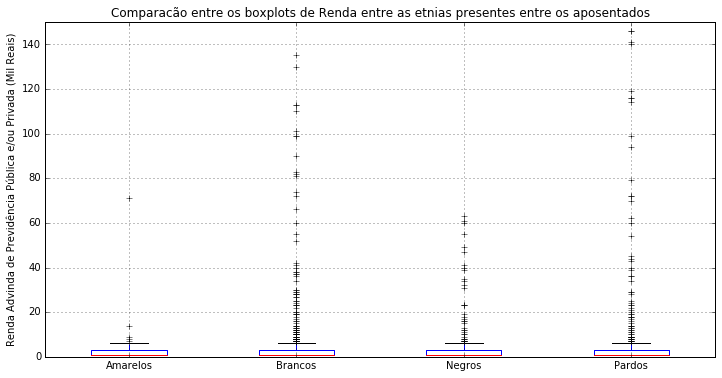

In [258]:
para_rendas_etnias =  pd.DataFrame.from_dict(data=dici2)
para_rendas_etnias.plot.box(figsize=(12,6), legend= True, grid = True, title= 'Comparacão entre os boxplots de Renda entre as etnias presentes entre os aposentados' )
axes = plt.gca()
axes.set_ylim([0,150])
plt.ylabel('Renda Advinda de Previdência Pública e/ou Privada (Mil Reais)')
plt.show()

###### Gráfico 2

### Na análise das etnias é possível perceber que os grupos têm um comportamento bastante similar quando observamos números parecidos de pessoas. Isso nos mosra que, caso o número de pessoas e o acesso à educação fossem iguai, a etnia não interferiria muito na qualidade de vida (considerando só a renda) das pessoas.